# Node Placement and Color Palettes

In this chapter, we demonstrate ways in which graph coloring solutions can be visualized using tools from the ``networkx`` and ``gcol`` libraries. Further information on the former can be found in its [online documentation](https://networkx.org/documentation/stable/reference/index.html).

## Node Placement

Node placement is an important aspect of network visualization because it shapes how structure and meaning are perceived. Good layouts can reveal patterns such as communities and hierarchies, making relationships easier to observe. Poor placement, by contrast, can obscure connectivity and suggest structure that is not actually present. Effective node placement schemes therefore seek to reduce visual clutter, highlight relevant features, and align the geometry of the drawing with the underlying topology of the network.

The following code generates and shows a coloring of a [dodecahedron graph](https://en.wikipedia.org/wiki/Regular_dodecahedron). This was also seen in the previous chapter. In the figure, the node positions are determined using the method ``nx.spring_layout()``, which is provided by ``networkx``. This is an example of a force-directed method, which models nodes as mutually repelling elements and edges as springs. The method iteratively adjusts the node' positions to minimize an energy function, balancing the attracting forces of edges and the repulsive forces from nodes. The aim is to create an aesthetically pleasing layout where groups of related nodes are close, unrelated nodes are separated, and few edges intersect.

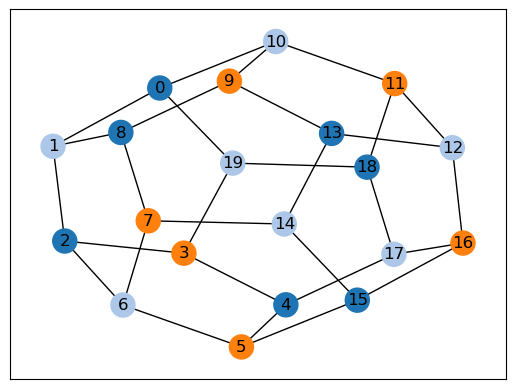

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import gcol

G = nx.dodecahedral_graph()
c = gcol.node_coloring(G)
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    node_color=gcol.get_node_colors(G, c)
)
plt.show()

Different layouts can be determined with the ``nx.spring_layout()`` method by simply changing the seed parameter. Note that, although the look different, these colorings are equivalent.

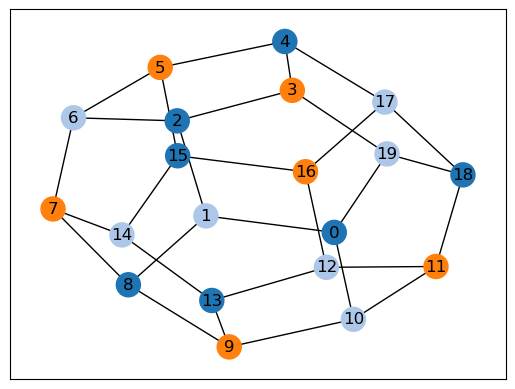

In [2]:
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=2), 
    node_color=gcol.get_node_colors(G, c)
)
plt.show()

Other layout methods are also available in ``networkx``, such as ``nx.spectral_layout()``,

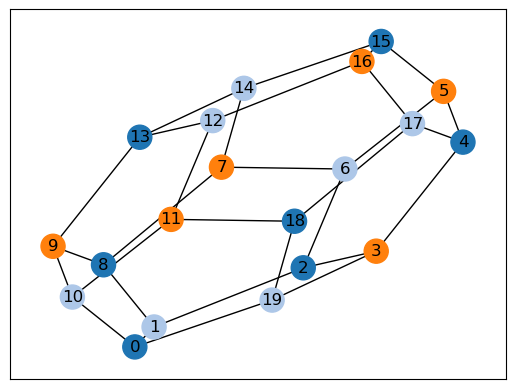

In [3]:
nx.draw_networkx(
    G, 
    pos=nx.spectral_layout(G), 
    node_color=gcol.get_node_colors(G, c)
)
plt.show()

and ``nx.sprial_layout()``.

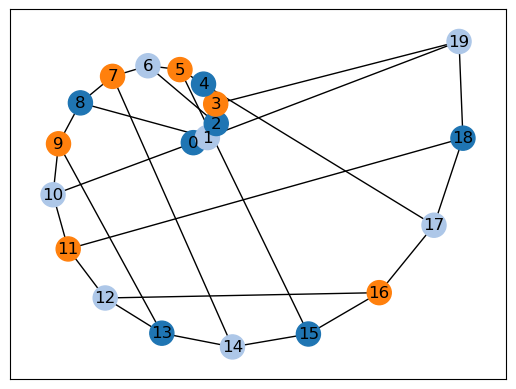

In [4]:
nx.draw_networkx(
    G, 
    pos=nx.spiral_layout(G), 
    node_color=gcol.get_node_colors(G, c)
)
plt.show()

We can also simply place the nodes in random positions, though this may lead to unclear visualizations. 

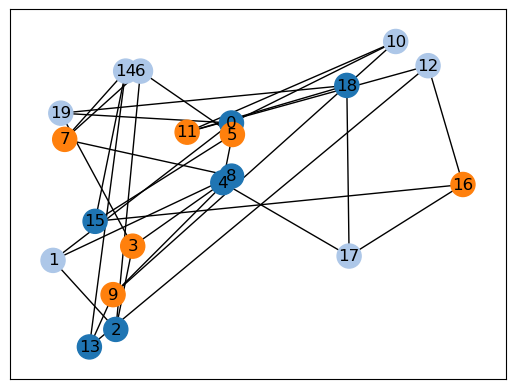

In [5]:
nx.draw_networkx(
    G, 
    pos=nx.random_layout(G, seed=1), 
    node_color=gcol.get_node_colors(G, c)
)
plt.show()

The visualization of graphs becomes more difficult for higher numbers of nodes and edges, and when the graph features few obvious structural patterns. The following example illustrates this using a randomly generated [Erdos-Renyi graph](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model) $G(50,0.15)$.

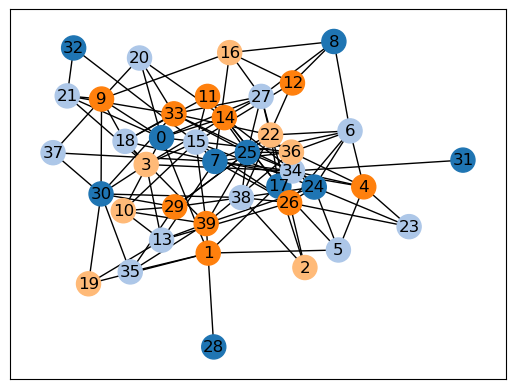

In [6]:
G = nx.gnp_random_graph(40, 0.15, seed=1)
c = gcol.node_coloring(G)
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    node_color=gcol.get_node_colors(G, c)
)
plt.show()

In the above, the ``nx.spring_layout()`` method has given a rather cluttered layout. Also, the colors of the nodes have not been considered when determining their positions. Consequently, two alternatives are offered by the ``gcol`` library. The first of these, ``gcol.multipartite_layout()`` puts the nodes of each color into columns. The same solution as above is now shown below.

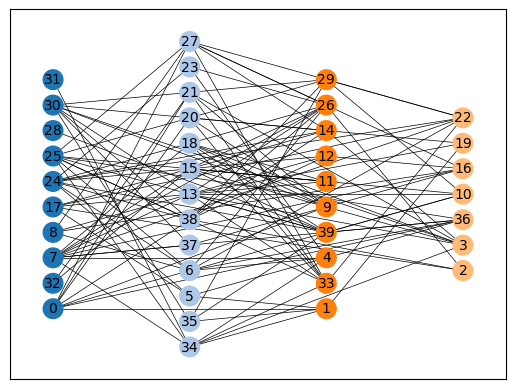

In [7]:
nx.draw_networkx(
    G, 
    pos=gcol.multipartite_layout(G, c),
    node_color=gcol.get_node_colors(G, c),
    width=0.5,
    node_size=200,
    font_size=10
)
plt.show()

Note that we cannot have vertical edges when using this method of visualization. It is also clear that each column of nodes corresponds to an independent set. 

The second option is the ``gcol.coloring_layout()`` method. This places all nodes on the circumference of a circle, with nodes of the same color in adjacent positions.

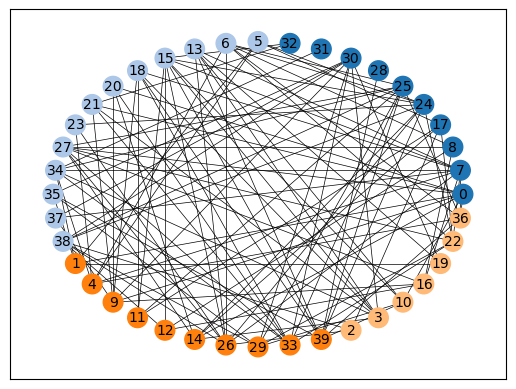

In [8]:
nx.draw_networkx(
    G, 
    pos=gcol.coloring_layout(G, c),
    node_color=gcol.get_node_colors(G, c),
    width=0.5,
    node_size=200,
    font_size=10
)
plt.show()

## Color Palettes

So far, the colors used to display the above solutions have been taken from the in-built default color palette ``gcol.tableau``, which maps the integers $0,1,2,\ldots$ to RGB triplets. This palette is a collection of 21 colors, provided by Tableau, that are intended to be aesthetically pleasing and easy on the eye. However, other options are available in the ``gcol`` library: ``gcol.colorful`` gives a collection of 57 bright colors that are chosen to contrast each other as much as possible; ``gcol.colorblind`` gives eleven colors (also provided by Tableau) that are intended to be easily distinguishable by those with colorblindness. A demonstration of these palettes is now given.

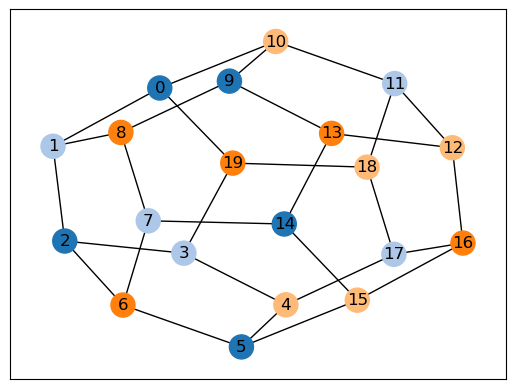

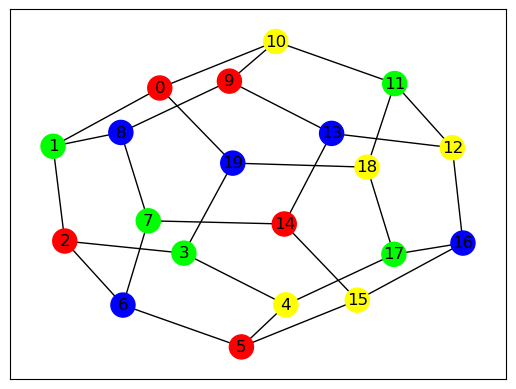

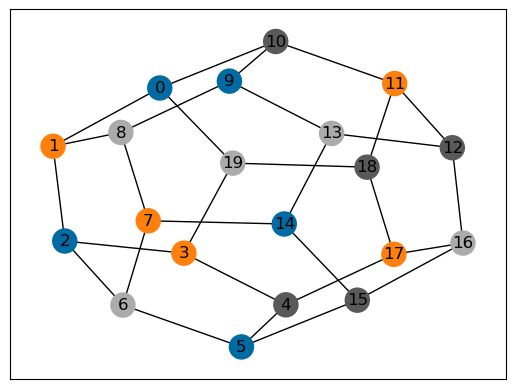

In [9]:
G = nx.dodecahedral_graph()
c = gcol.node_k_coloring(G, 4)
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    node_color=gcol.get_node_colors(G, c, palette=gcol.tableau)
)
plt.show()

nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    node_color=gcol.get_node_colors(G, c, palette=gcol.colorful)
)
plt.show()

nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    node_color=gcol.get_node_colors(G, c, palette=gcol.colorblind)
)
plt.show()

The following shows the colors that are available in each palette. These are identified by the integers, starting from 0.

The (default) gcol.tableau palette (20 colors):


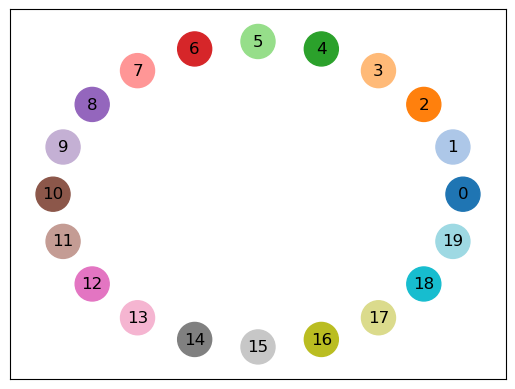

The gcol.colorful palette (56 colors):


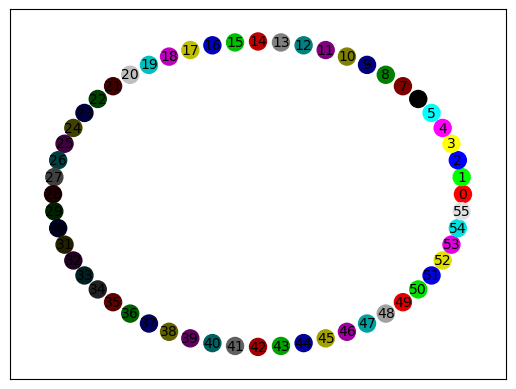

The gcol.colorblind palette (10 colors):


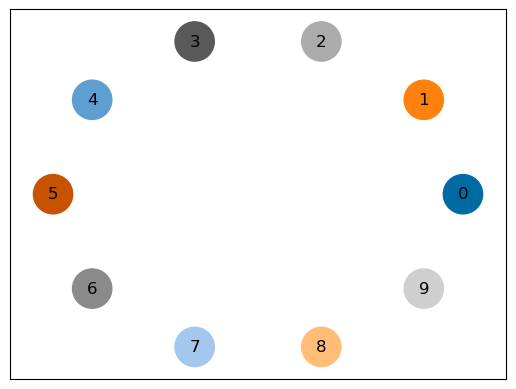

In [12]:
G = nx.complete_graph(20)
c = gcol.node_coloring(G)
nx.draw_networkx(
    G, 
    node_color=gcol.get_node_colors(G, c, gcol.tableau),
    pos=gcol.coloring_layout(G, c),
    node_size=600,
    width=0.00
)
print("The (default) gcol.tableau palette (20 colors):")
plt.show()
    
G = nx.complete_graph(56)
c = gcol.node_coloring(G)
nx.draw_networkx(
    G, 
    node_color=gcol.get_node_colors(G, c, gcol.colorful),
    pos=gcol.coloring_layout(G, c),
    node_size=150,
    font_size=10,
    width=0.00
)
print("The gcol.colorful palette (56 colors):")
plt.show()
    
G = nx.complete_graph(10)
c = gcol.node_coloring(G)
nx.draw_networkx(
    G, 
    node_color=gcol.get_node_colors(G, c, gcol.colorblind),
    pos=gcol.coloring_layout(G, c),
    node_size=800,
    width=0.00
)
print("The gcol.colorblind palette (10 colors):")
plt.show()

User-defined palettes can also be created. The following demonstrates how to create a greyscale palette based on the number of colors $k$ in the current solution ``c``.

Custom greyscale palette based on three colors:


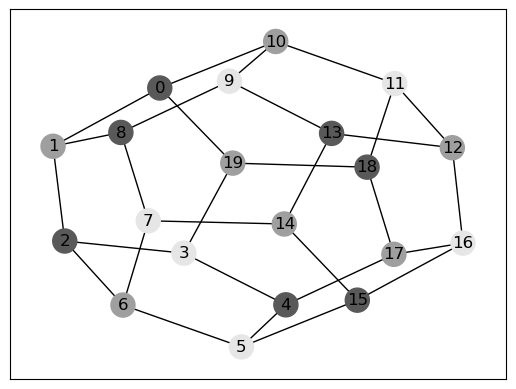

In [11]:
def grayscale(k):
    minVal, maxVal, palette = 0.35, 0.9, {}
    step = (maxVal - minVal) / (k - 1)
    for i in range(k):
        x = minVal + step * i
        palette[i] = (x, x, x)
    palette[-1] = (1.0, 1.0, 1.0)
    return palette

G = nx.dodecahedral_graph()
c = gcol.node_coloring(G)
k = max(c.values()) + 1
print("Custom greyscale palette based on three colors:") 
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    node_color=gcol.get_node_colors(G, c, palette=grayscale(k))
)
plt.show()